# **Análisis Exploratorio de Datos: Dataset de Hongos**

Mushroom [Dataset]. (1981). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.

## Descripción del Dataset

Este conjunto de datos contiene descripciones de muestras hipotéticas correspondientes a 23 especies de hongos de la Familia Agaricus y Lepiota. El objetivo principal es clasificar los hongos utilizando clustering en dos categorías: comestibles y venenosos.

### Características del Dataset
- **Número de variables**: 23
- **Tipo de datos**: Categóricos

### Variables del Dataset

#### Características del Sombrero (Cap)

1. **class**: Tipo de hongo
- edible (e) = comestible
- poisonous (p) = venenoso

2. **cap-shape**: Forma del sombrero
   - bell (b) = campana
   - conical (c) = cónico
   - convex (x) = convexo
   - flat (f) = plano
   - knobbed (k) = protuberante
   - sunken (s) = hundido

3. **cap-surface**: Superficie del sombrero
   - fibrous (f) = fibroso
   - grooves (g) = con surcos
   - scaly (y) = escamoso
   - smooth (s) = suave

4. **cap-color**: Color del sombrero
   - brown (n), buff (b), cinnamon (c), gray (g), green (r)
   - pink (p), purple (u), red (e), white (w), yellow (y)

#### Características Físicas
5. **bruises**: Presencia de magulladuras
   - bruises (t) = sí
   - no (f) = no

6. **odor**: Olor
   - almond (a) = almendra
   - anise (l) = anís
   - creosote (c) = creosota
   - fishy (y) = pescado
   - foul (f) = desagradable
   - musty (m) = mohoso
   - none (n) = ninguno
   - pungent (p) = penetrante
   - spicy (s) = especiado

#### Características de las Branquias (Gill)
7. **gill-attachment**: Fijación de las branquias
8. **gill-spacing**: Espaciado entre branquias
9. **gill-size**: Tamaño de las branquias
10. **gill-color**: Color de las branquias

#### Características del Tallo (Stalk)
11. **stalk-shape**: Forma del tallo
12. **stalk-root**: Raíz del tallo
13. **stalk-surface-above-ring**: Superficie sobre el anillo
14. **stalk-surface-below-ring**: Superficie bajo el anillo
15. **stalk-color-above-ring**: Color sobre el anillo
16. **stalk-color-below-ring**: Color bajo el anillo

#### Características del Velo y Anillo
17. **veil-type**: Tipo de velo
18. **veil-color**: Color del velo
19. **ring-number**: Número de anillos
20. **ring-type**: Tipo de anillo

#### Características Adicionales
21. **spore-print-color**: Color de la impresión de esporas
22. **population**: Población
    - abundant (a) = abundante
    - clustered (c) = agrupado
    - numerous (n) = numeroso
    - scattered (s) = disperso
    - several (v) = varios
    - solitary (y) = solitario

23. **habitat**: Hábitat
    - grasses (g) = pastizales
    - leaves (l) = hojas
    - meadows (m) = praderas
    - paths (p) = senderos
    - urban (u) = urbano
    - waste (w) = residuos
    - woods (d) = bosques

### Objetivo del Análisis
- Realizar un análisis exploratorio completo de los datos
- Identificar patrones y relaciones entre las variables
- Comprender la estructura natural de los datos mediante técnicas de clustering


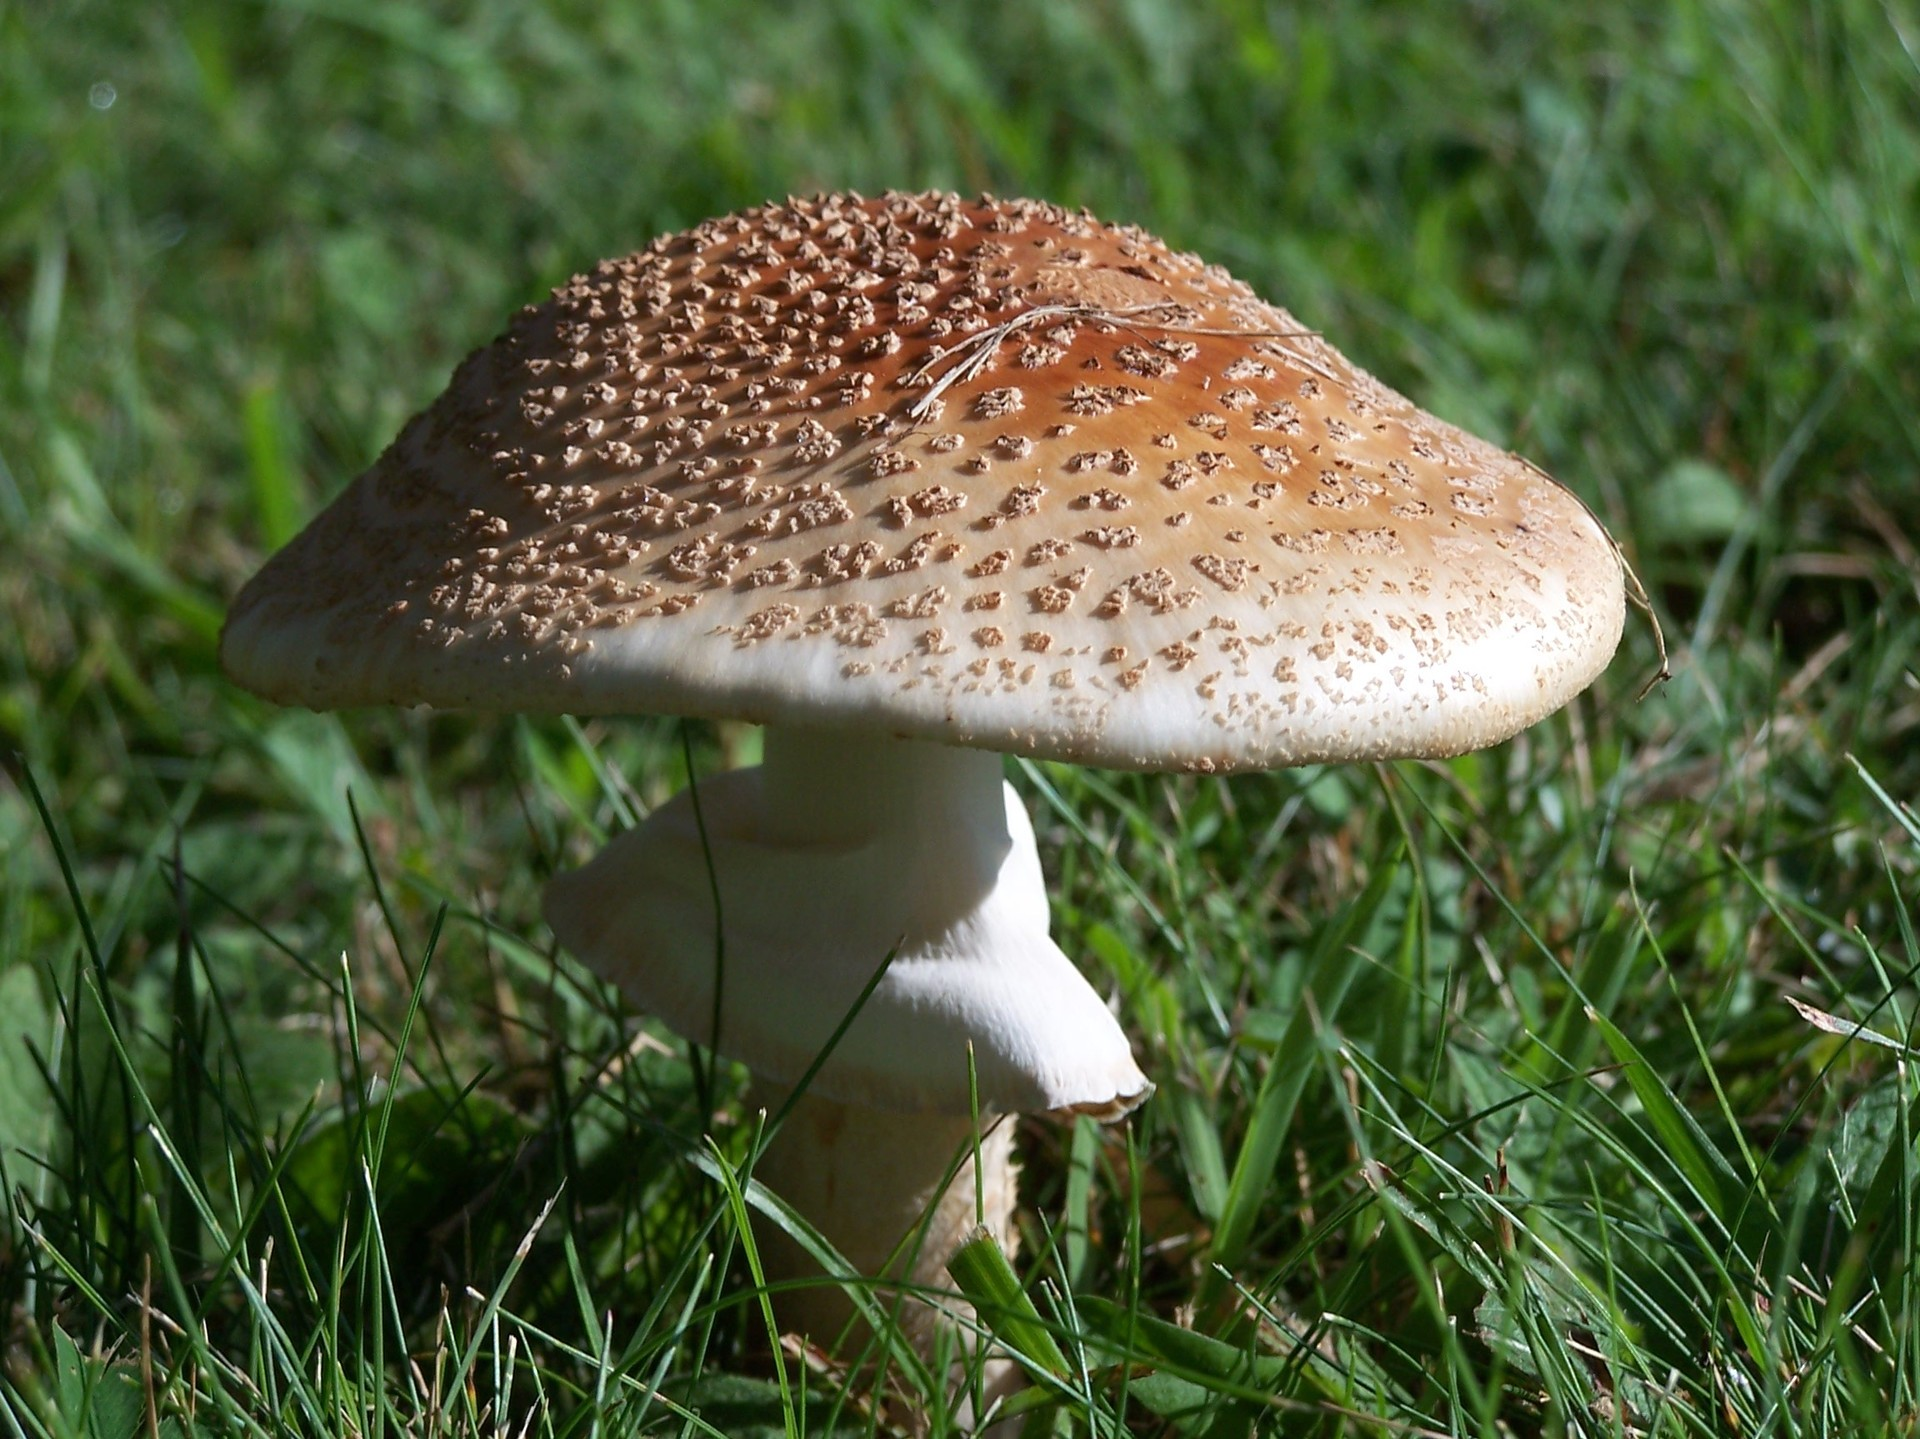

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [139]:
df = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')

In [140]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [142]:
df.nunique()

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [143]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


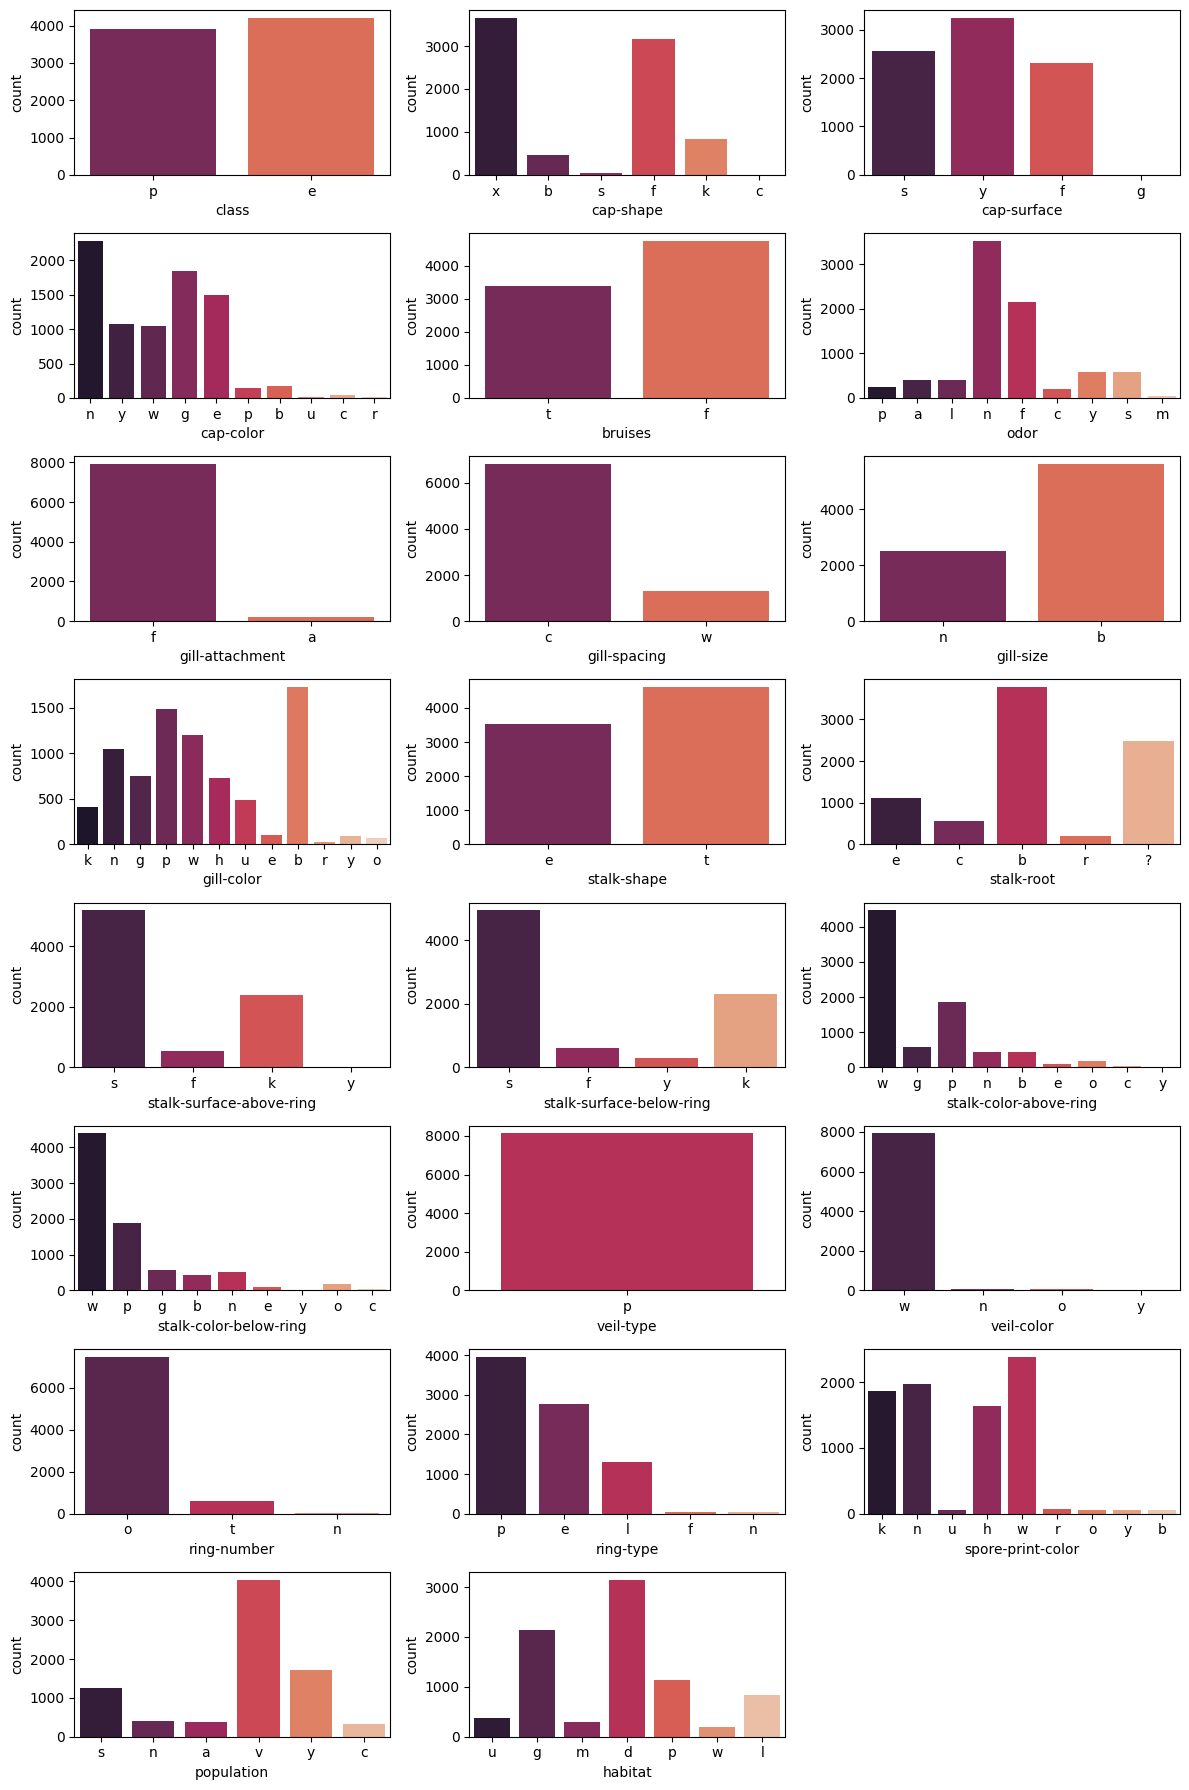

In [144]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(12, 18))

for index, col in enumerate(df.columns):
    x, y = index // 3, index % 3
    sns.countplot(data=df, x=col, ax=axes[x][y], palette="rocket")

fig.delaxes(axes[7][2])

plt.tight_layout()
plt.show()

In [145]:
target = df['class']
df = df.drop(['class'], axis=1)

In [146]:
from scipy.stats import chi2_contingency

## Coeficiente V de Cramer para la Correlación

### Limitaciones de la Correlación Tradicional

La correlación de Pearson, que es la más comúnmente utilizada, no es apropiada para nuestro dataset porque:
- Solo funciona con variables numéricas continuas
- Asume una relación lineal entre variables
- No puede manejar variables categóricas (como las que tenemos en nuestro dataset de hongos)

### Ventajas del Coeficiente V de Cramer

1. **Diseñado para Variables Categóricas**
   - Perfecto para variables nominales (como colores, formas, tipos)
   - No asume ningún orden en las categorías
   - Puede manejar variables con diferente número de categorías

2. **Fácil Interpretación**
   - Varía entre 0 (no hay asociación) y 1 (asociación perfecta)
   - Similar a la escala de correlación tradicional
   - Valores sugeridos para interpretación:
     * 0.0 a 0.1: Asociación negligible
     * 0.1 a 0.3: Asociación débil
     * 0.3 a 0.5: Asociación moderada
     * 0.5 a 0.7: Asociación fuerte
     * 0.7 a 1.0: Asociación muy fuerte

3. **Base Estadística Sólida**
   - Basado en la prueba de chi-cuadrado
   - Normalizado para ser independiente del tamaño de la muestra
   - Considera los grados de libertad de las variables

### Aplicación en Nuestro Dataset

Es particularmente útil para nuestro análisis porque:
- Todas nuestras variables son categóricas (colores, formas, tipos, etc.)
- Necesitamos entender las asociaciones entre características del hongo
- Queremos identificar patrones que puedan ser útiles para la clasificación

### Fórmula

El coeficiente V de Cramer se calcula como:

$V = \sqrt{\frac{\chi^2}{n \cdot min(k-1, r-1)}}$

Donde:
- $\chi^2$ es el estadístico chi-cuadrado
- $n$ es el número total de observaciones
- $k$ y $r$ son el número de categorías de cada variable

In [147]:
def cramers_v(var1, var2):
    """
    Calcula el coeficiente Cramer's V entre dos variables
    """
    crosstab = pd.crosstab(var1, var2)
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    min_dim = min(crosstab.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Crear matriz de correlación usando Cramer's V
def create_cramer_matrix(df):
    cols = df.columns
    n_cols = len(cols)
    cramer_matrix = np.zeros((n_cols, n_cols))

    for i in range(n_cols):
        for j in range(n_cols):
            if i != j:
                cramer_matrix[i,j] = cramers_v(df[cols[i]], df[cols[j]])
            else:
                cramer_matrix[i,j] = 1

    return pd.DataFrame(cramer_matrix, index=cols, columns=cols)

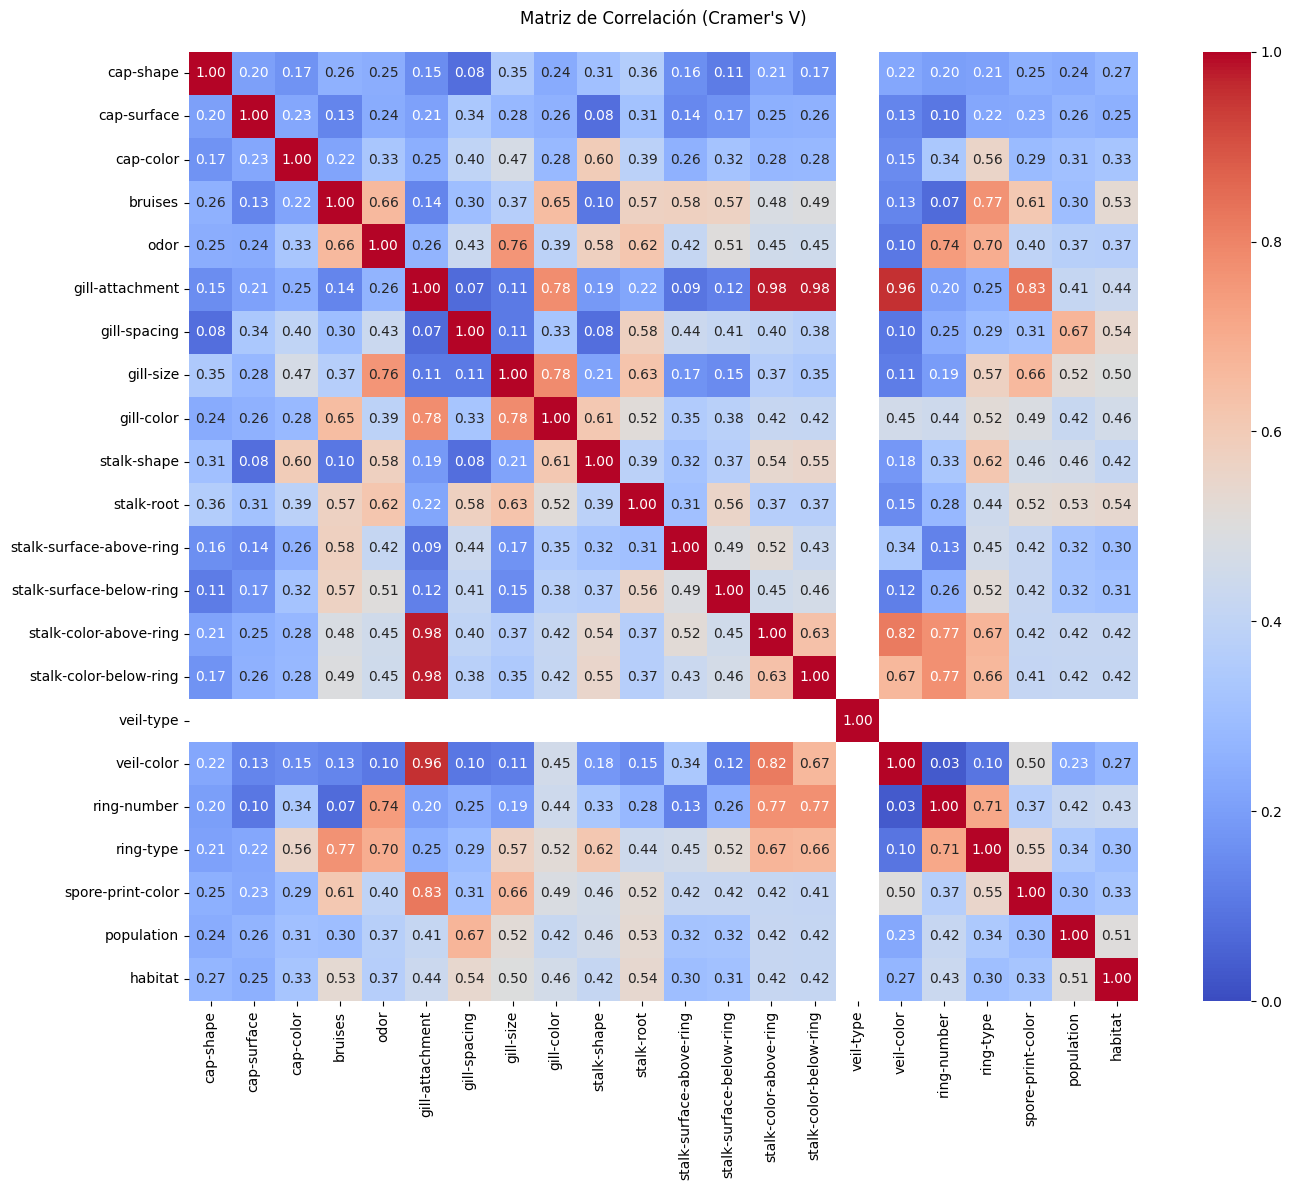

In [148]:
# Crear el heatmap
def plot_correlation_heatmap(correlation_matrix):
    plt.figure(figsize=(15, 12))
    sns.heatmap(correlation_matrix,
                annot=True,  # Mostrar valores
                cmap='coolwarm',  # Esquema de colores
                vmin=0, vmax=1,  # Rango de valores
                fmt='.2f',  # Formato de números (2 decimales)
                square=True)  # Hacer las celdas cuadradas
    plt.title('Matriz de Correlación (Cramer\'s V)', pad=20)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Ejecutar el análisis
cramer_matrix = create_cramer_matrix(df)
plot_correlation_heatmap(cramer_matrix)

### Análisis de la Variable 'veil-type'

Al examinar la matriz de correlación, se observó que la variable 'veil-type' muestra correlaciones nulas con todas las demás variables, esto se debe a que solo tiene un valor único, por lo tanto no es relevante para el estudio.


In [149]:
# Verificar valores únicos
print("Valores únicos en veil-type:", df['veil-type'].unique())
print("\nDistribución de valores en veil-type:")
print(df['veil-type'].value_counts())

Valores únicos en veil-type: ['p']

Distribución de valores en veil-type:
veil-type
p    8124
Name: count, dtype: int64


In [150]:
df = df.drop(['veil-type'],axis=1)

# **Clustering con K-modes**

Para el análisis de clustering de nuestro conjunto de datos de hongos, se implementó el algoritmo K-modes (de Vos, 2015-2021). La elección de este algoritmo se fundamenta en su capacidad para manejar datos categóricos de manera nativa, característica esencial dado que nuestro dataset está compuesto enteramente por variables categóricas.

K-modes extiende el principio del algoritmo K-means tradicional, pero reemplaza:
- La media por la moda en el cálculo de centroides
- La distancia euclidiana por una medida de disimilitud simple para variables categóricas

Esta adaptación permite:
1. Procesar directamente datos categóricos sin transformaciones previas
2. Mantener la interpretabilidad de los resultados
3. Evitar el aumento de dimensionalidad que ocurriría con técnicas como one-hot encoding

### Referencias

kmodes categorical clustering library
Autor: Nelis J. de Vos
Año: 2015-2021
URL: https://github.com/nicodv/kmodes

In [151]:
!pip install kmodes

In [152]:
from kmodes.kmodes import KModes

# Inicializar K-Modes
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)

# Ajustar el modelo
clusters = km.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 562, cost: 62619.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 338, cost: 62474.0
Run 2, iteration: 2/100, moves: 42, cost: 62474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1003, cost: 62592.0
Run 3, iteration: 2/100, moves: 117, cost: 62592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 984, cost: 64974.0
Run 4, iteration: 2/100, moves: 152, cost: 64974.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 516, cost: 63968.0
Best run was number 2


In [153]:
predicted_labels = pd.DataFrame(clusters, columns=['predicted_label'])

Text(0.5, 1.0, 'Clusters vs Clases Reales')

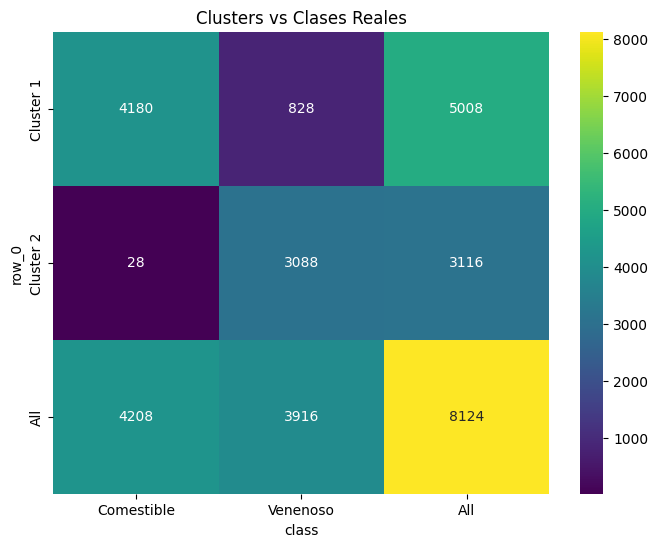

In [154]:
confusion_matrix = pd.crosstab(clusters, target, margins=True)
confusion_matrix = confusion_matrix.rename(index={0: 'Cluster 1', 1: 'Cluster 2'})
confusion_matrix = confusion_matrix.rename(columns={'e': 'Comestible', 'p': 'Venenoso'})

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Clusters vs Clases Reales')

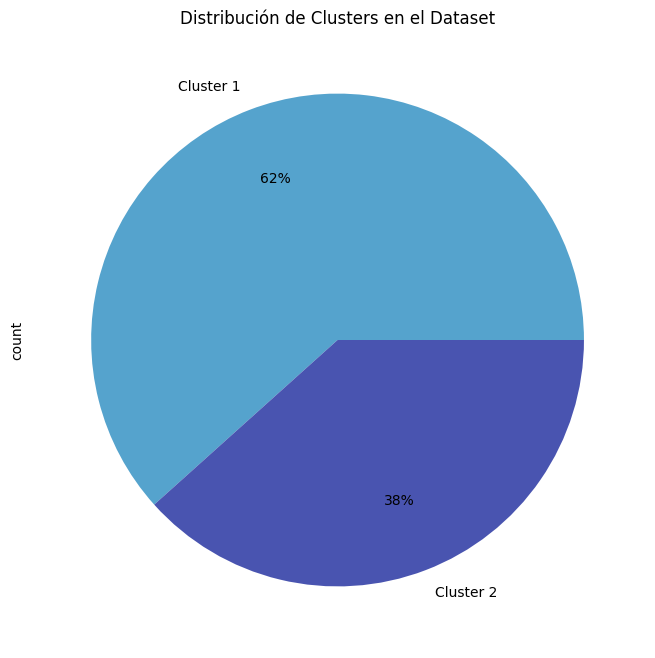

In [155]:
labels = {
    'Cluster 1': 'Cluster 1',
    'Cluster 2': 'Cluster 2'
}

# Convertir los clusters a una serie con las etiquetas correctas
cluster_series = pd.Series(clusters).map({0: 'Cluster 1', 1: 'Cluster 2'})

plt.figure(figsize=(8, 8))
cluster_series.value_counts().plot.pie(
    autopct='%1.0f%%',
    pctdistance=0.7,
    labeldistance=1.1,
    labels=['Cluster 1',
            'Cluster 2'],
    colors=sns.color_palette("icefire")
)

plt.title('Distribución de Clusters en el Dataset')
plt.show()

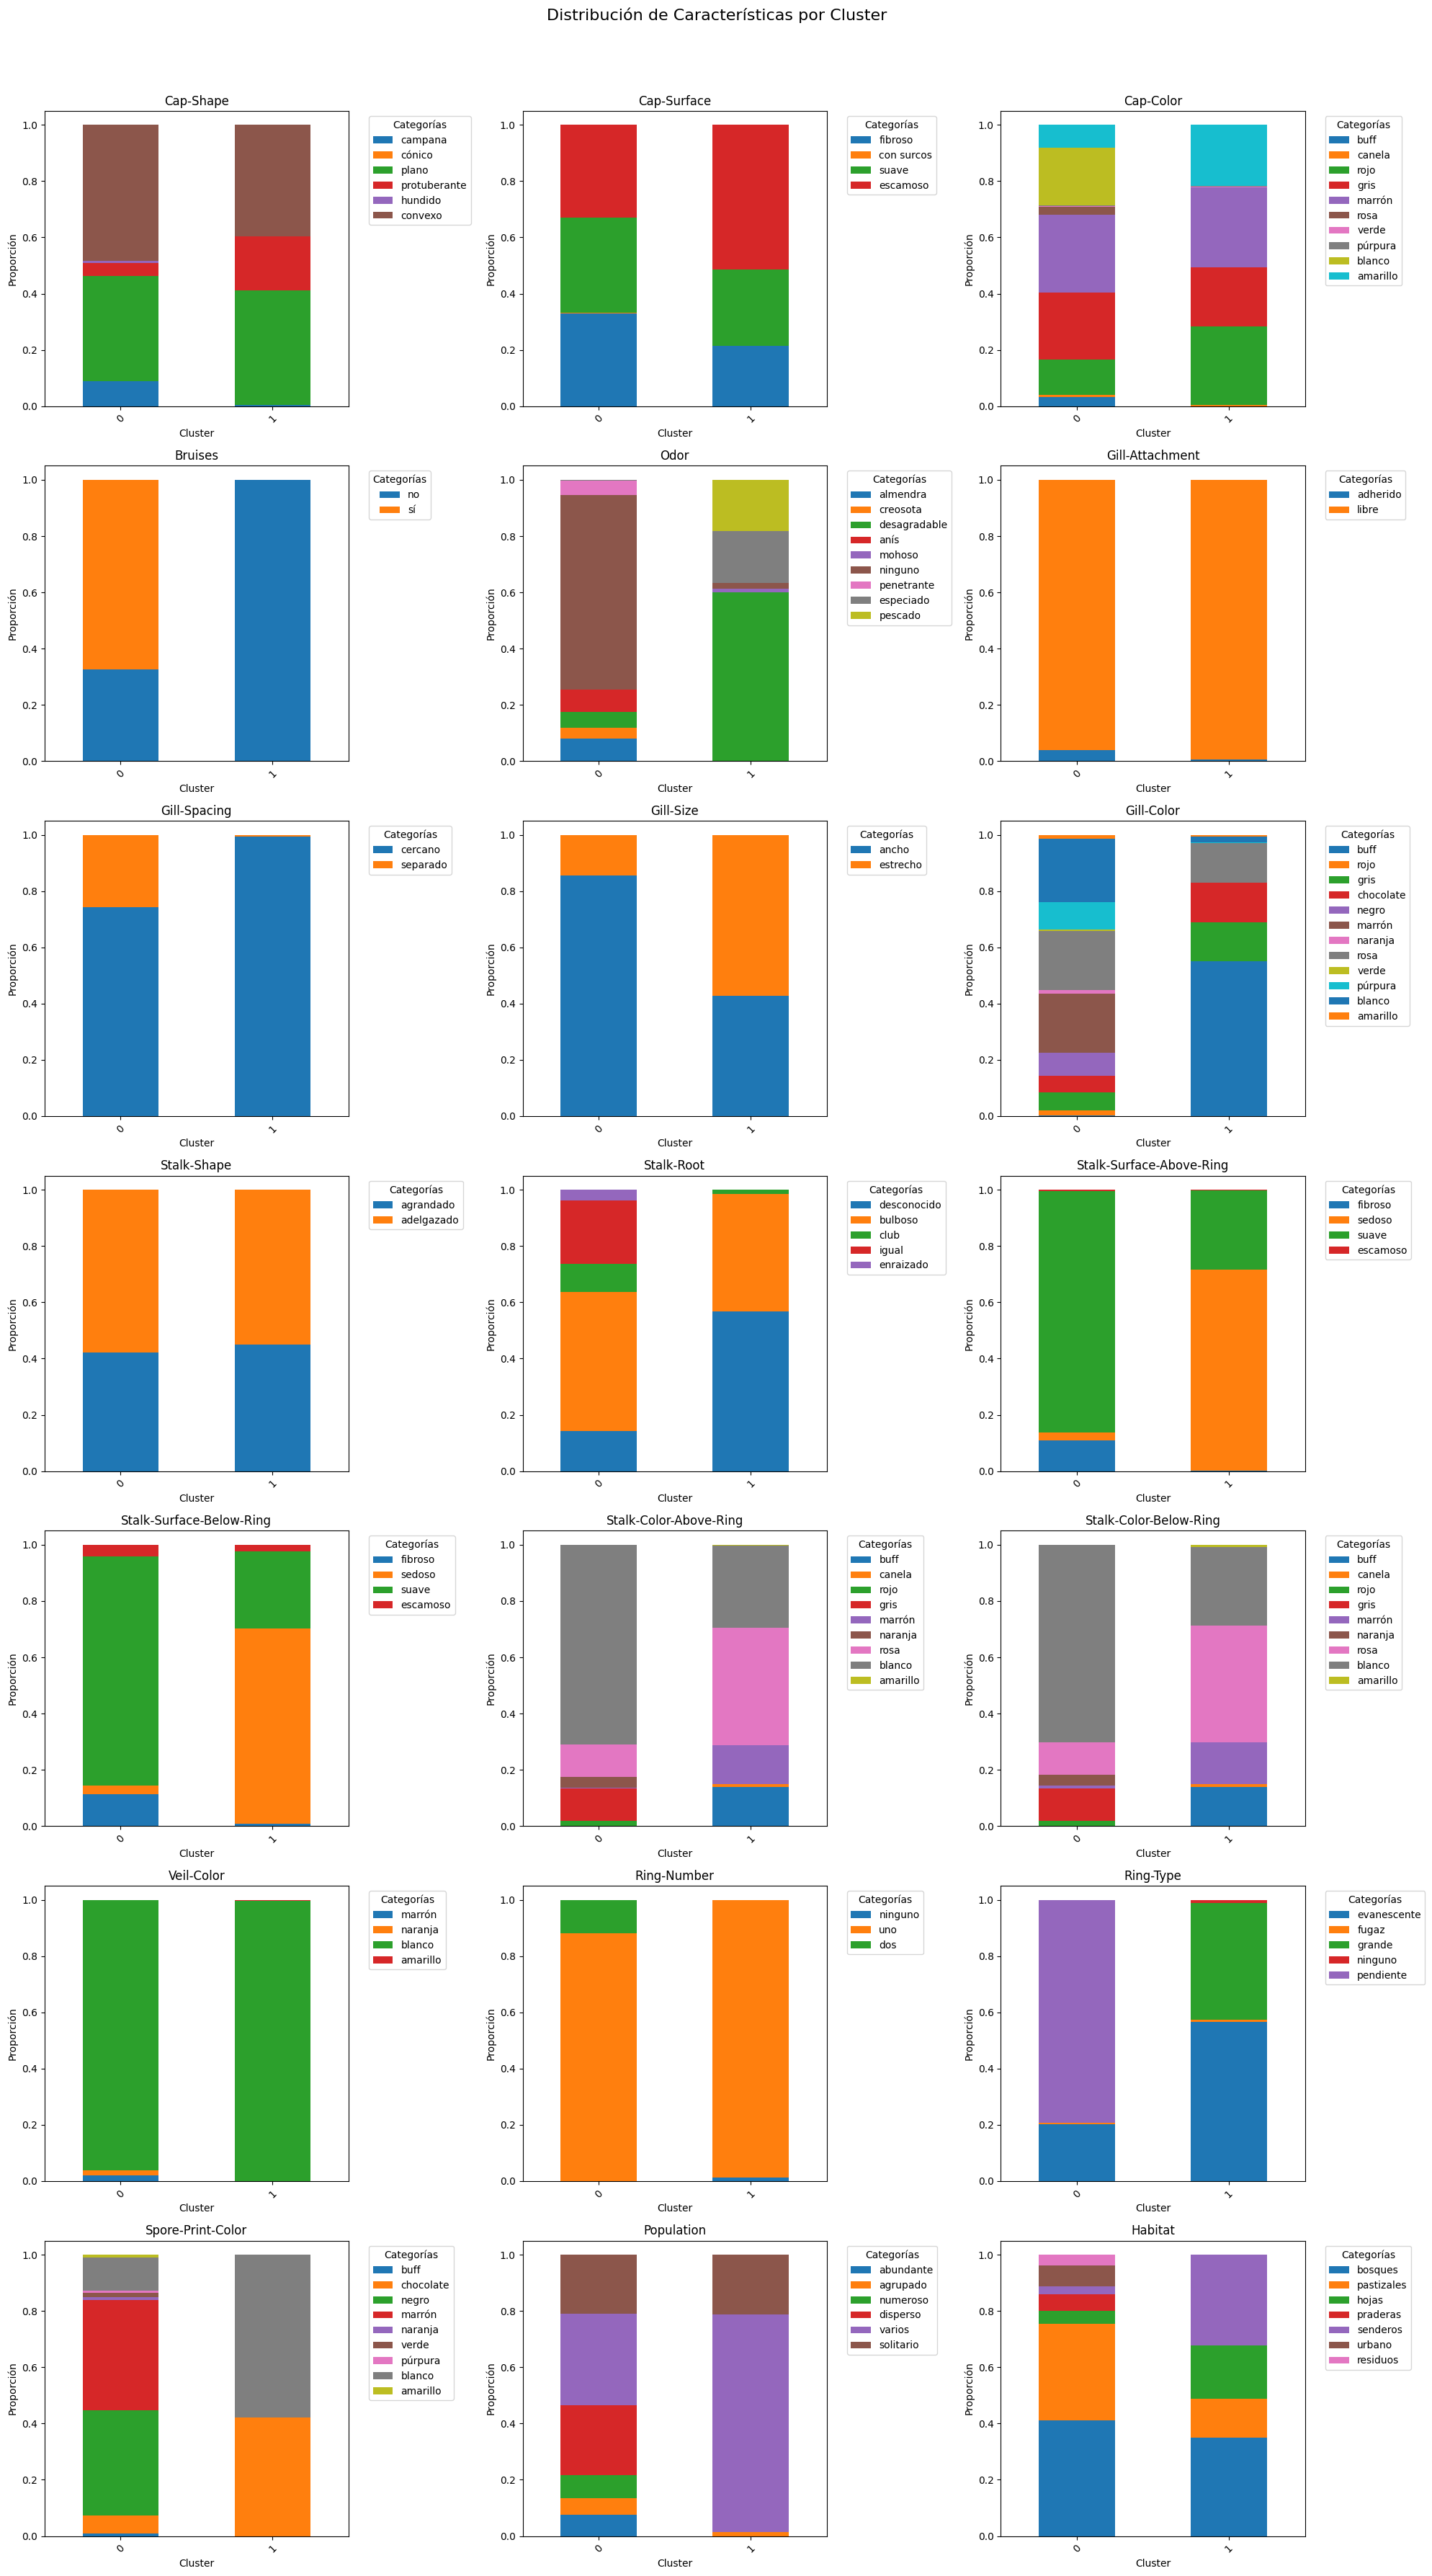

In [156]:
# 3. Distribución de características por cluster

mapeos = {
    'cap-shape': {
        'b': 'campana', 'c': 'cónico', 'x': 'convexo',
        'f': 'plano', 'k': 'protuberante', 's': 'hundido'
    },
    'cap-surface': {
        'f': 'fibroso', 'g': 'con surcos',
        'y': 'escamoso', 's': 'suave'
    },
    'cap-color': {
        'n': 'marrón', 'b': 'buff', 'c': 'canela', 'g': 'gris',
        'r': 'verde', 'p': 'rosa', 'u': 'púrpura', 'e': 'rojo',
        'w': 'blanco', 'y': 'amarillo'
    },
    'bruises': {
        't': 'sí',
        'f': 'no'
    },
    'odor': {
        'a': 'almendra', 'l': 'anís', 'c': 'creosota',
        'y': 'pescado', 'f': 'desagradable', 'm': 'mohoso',
        'n': 'ninguno', 'p': 'penetrante', 's': 'especiado'
    },
    'gill-attachment': {
        'a': 'adherido',
        'f': 'libre'
    },
    'gill-spacing': {
        'c': 'cercano',
        'w': 'separado'
    },
    'gill-size': {
        'b': 'ancho',
        'n': 'estrecho'
    },
    'gill-color': {
        'k': 'negro', 'n': 'marrón', 'b': 'buff', 'h': 'chocolate',
        'g': 'gris', 'r': 'verde', 'o': 'naranja', 'p': 'rosa',
        'u': 'púrpura', 'e': 'rojo', 'w': 'blanco', 'y': 'amarillo'
    },
    'stalk-shape': {
        'e': 'agrandado',
        't': 'adelgazado'
    },
    'stalk-root': {
        'b': 'bulboso', 'c': 'club', 'u': 'copa',
        'e': 'igual', 'z': 'rizomorfo', 'r': 'enraizado',
        '?': 'desconocido'
    },
    'stalk-surface-above-ring': {
        'f': 'fibroso', 'y': 'escamoso',
        'k': 'sedoso', 's': 'suave'
    },
    'stalk-surface-below-ring': {
        'f': 'fibroso', 'y': 'escamoso',
        'k': 'sedoso', 's': 'suave'
    },
    'stalk-color-above-ring': {
        'n': 'marrón', 'b': 'buff', 'c': 'canela', 'g': 'gris',
        'o': 'naranja', 'p': 'rosa', 'e': 'rojo', 'w': 'blanco',
        'y': 'amarillo'
    },
    'stalk-color-below-ring': {
        'n': 'marrón', 'b': 'buff', 'c': 'canela', 'g': 'gris',
        'o': 'naranja', 'p': 'rosa', 'e': 'rojo', 'w': 'blanco',
        'y': 'amarillo'
    },
    'veil-type': {
        'p': 'parcial',
        'u': 'universal'
    },
    'veil-color': {
        'n': 'marrón', 'o': 'naranja', 'w': 'blanco', 'y': 'amarillo'
    },
    'ring-number': {
        'n': 'ninguno',
        'o': 'uno',
        't': 'dos'
    },
    'ring-type': {
        'c': 'cortina', 'e': 'evanescente', 'f': 'fugaz',
        'l': 'grande', 'n': 'ninguno', 'p': 'pendiente',
        's': 'zona'
    },
    'spore-print-color': {
        'k': 'negro', 'n': 'marrón', 'b': 'buff', 'h': 'chocolate',
        'r': 'verde', 'o': 'naranja', 'u': 'púrpura', 'w': 'blanco',
        'y': 'amarillo'
    },
    'population': {
        'a': 'abundante', 'c': 'agrupado', 'n': 'numeroso',
        's': 'disperso', 'v': 'varios', 'y': 'solitario'
    },
    'habitat': {
        'g': 'pastizales', 'l': 'hojas', 'm': 'praderas',
        'p': 'senderos', 'u': 'urbano', 'w': 'residuos',
        'd': 'bosques'
    }
}


df['Cluster'] = clusters
n_features = len(df.columns[:-1])
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))

for idx, columna in enumerate(df.columns[:-1]):
    x, y = idx // n_cols, idx % n_cols

    ct = pd.crosstab(df['Cluster'], df[columna], normalize='index')

    if columna in mapeos:
        ct = ct.rename(columns=mapeos[columna])

    ct.plot(kind='bar', stacked=True, ax=axes[x,y])

    axes[x,y].set_title(f'{columna.replace("_", " ").title()}')
    axes[x,y].set_xlabel('Cluster')
    axes[x,y].set_ylabel('Proporción')
    axes[x,y].legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[x,y].tick_params(axis='x', rotation=45)

for idx in range(n_features, n_rows * n_cols):
    x, y = idx // n_cols, idx % n_cols
    fig.delaxes(axes[x,y])

plt.suptitle('Distribución de Características por Cluster', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# **Evaluación de la Calidad del Clustering**

Para evaluar la calidad de nuestro clustering, utilizamos dos métricas importantes que nos permiten cuantificar qué tan bien nuestro algoritmo ha capturado la estructura real de los datos.

## 1. Adjusted Rand Index (ARI)

* **Definición**: Mide la similitud entre dos asignaciones de datos, ajustando por la casualidad.
* **Rango**: [-1, 1]
  * 1: Clustering perfecto
  * 0: Clustering aleatorio
  * <0: Clustering peor que aleatorio
* **Interpretación**:
  * Valores más cercanos a 1 indican mejor concordancia entre clusters y clases reales
  * Es ajustado para el azar, lo que lo hace más robusto

## 2. Normalized Mutual Information (NMI)

* **Definición**: Mide la información mutua entre la asignación de clusters y las etiquetas verdaderas.
* **Rango**: [0, 1]
  * 1: Correspondencia perfecta
  * 0: Asignaciones completamente independientes
* **Interpretación**:
  * Valores más altos indican mayor dependencia entre clusters y clases reales
  * Normalizado para facilitar comparaciones

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [159]:
ari = adjusted_rand_score(target, clusters)
nmi = normalized_mutual_info_score(target, clusters)
print(f'Adjusted Rand Index: {ari:.3f}')
print(f'Normalized Mutual Information: {nmi:.3f}')

Adjusted Rand Index: 0.623
Normalized Mutual Information: 0.584


# **Aplicación de UMAP en el Análisis de Hongos**

## **Objetivos**

1. Visualizar la distribución de hongos comestibles y venenosos en un espacio bidimensional para facilitar la interpretación de patrones y agrupaciones naturales.

2. Validar los resultados del clustering previo mediante la comparación de clusters generados con las clases reales.

3. Entender mejor la estructura natural de los datos para identificar relaciones entre características y patrones ocultos.

In [157]:
from umap import UMAP

In [162]:
X_numeric = pd.get_dummies(df.drop(['Cluster'], axis=1))

# Aplicar UMAP
umap_model = UMAP(random_state=42)
embedding = umap_model.fit_transform(X_numeric)

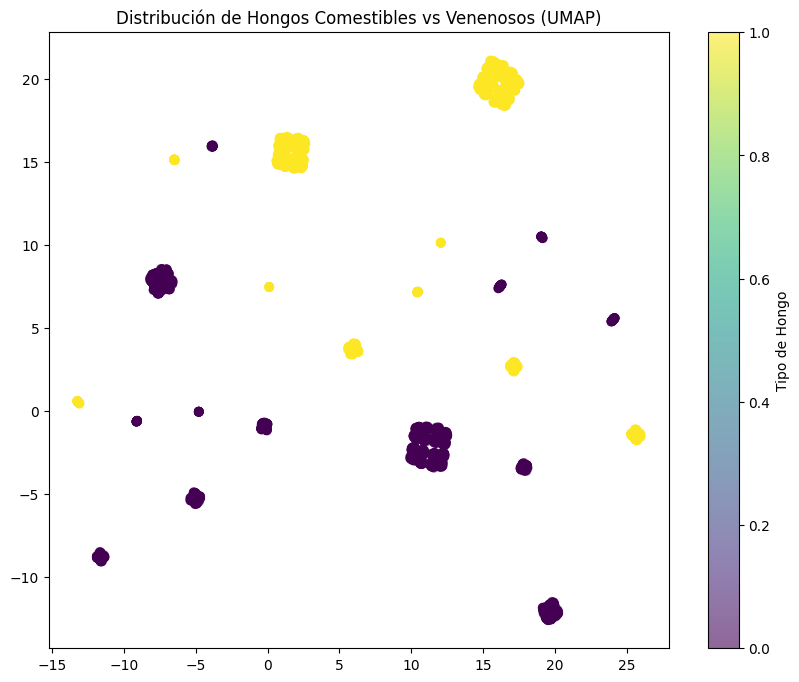

In [163]:
# Visualizar por tipo (comestible/venenoso) con dataset real
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                     c=target.map({'e': 0, 'p': 1}),
                     cmap='viridis',
                     alpha=0.6)
plt.title('Distribución de Hongos Comestibles vs Venenosos (UMAP)')
plt.colorbar(scatter, label='Tipo de Hongo')
plt.show()

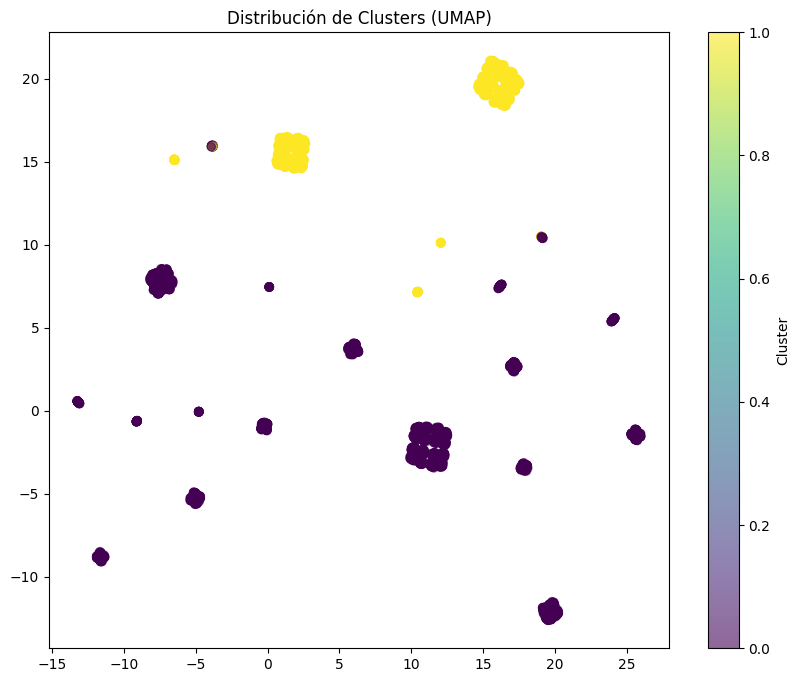

In [165]:
# Visualizar por clusters encontrados
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1],
                     c=clusters,
                     cmap='viridis',
                     alpha=0.6)
plt.title('Distribución de Clusters (UMAP)')
plt.colorbar(scatter, label='Cluster')
plt.show()